In [94]:
import numpy as np
import matplotlib.pyplot as plt
from miscellaneous.optics.functions import gauss_1d, lens_1d, rect_1d, sin_1d

In [95]:
def um2m(um):
    return um * 1e-6

def nm2m(nm):
    return nm * 1e-9

def mm2m(mm):
    return mm * 1e-3

def px2m(px, px_size_m=5.04e-6):
    return px * px_size_m

In [96]:
width = 512
x = np.arange(-width // 2, width // 2)
px_size = um2m(5)
wavelength = nm2m(555)

In [97]:
i_amplitude = 0.5
i_wx= width / 10
i_x0 = 0
# intensity = gauss_1d(x, a=i_amplitude, w=i_wx, x0=i_x0, y0=0.)
intensity = i_amplitude * np.ones(width)

In [116]:
focus = mm2m(100)
# phase = lens_1d(
#     px2m(x, px_size_m=px_size),
#     focus,
#     wavelength,
#     width * px_size,
#     converge=1
# )
phase = sin_1d(x, T=24*np.pi)

In [117]:
a_wx = width // 2
a_x0 = 0
aperture = rect_1d(x, a=1, w=a_wx, x0=a_x0)

complex_field = np.sqrt(intensity) * np.exp(1j * phase) * aperture

In [121]:
np.save('/Users/m.konoplyov/Programming/Python/TIE-autofocusing/images/sin_0.5_intensity.npy', complex_field)

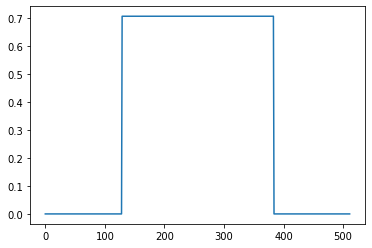

In [120]:
plt.plot(np.abs(complex_field))